## import modules

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
sns.set_style("white")


------
## data
read, shape, head, info

In [2]:
data_train=pd.read_csv('../input/titanic/train.csv')

In [3]:
data_train.shape

(891, 12)

In [4]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


 
 
-----------------
## separate numerical X values from all data + y

In [6]:
num_feature_names = ["Age", "SibSp", "Parch", "Fare"] + ["Survived"]
num_feature_names

['Age', 'SibSp', 'Parch', 'Fare', 'Survived']

In [7]:
data_train_num = data_train[num_feature_names]
data_train_num.shape

(891, 5)

In [8]:
data_train_num.head()

,Age,SibSp,Parch,Fare,Survived
0,22.0,1,0,7.2500,0
1,38.0,1,0,71.2833,1
2,26.0,0,0,7.9250,1
3,35.0,1,0,53.1000,1
4,35.0,0,0,8.0500,0


In [9]:
data_train_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   SibSp     891 non-null    int64  
 2   Parch     891 non-null    int64  
 3   Fare      891 non-null    float64
 4   Survived  891 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


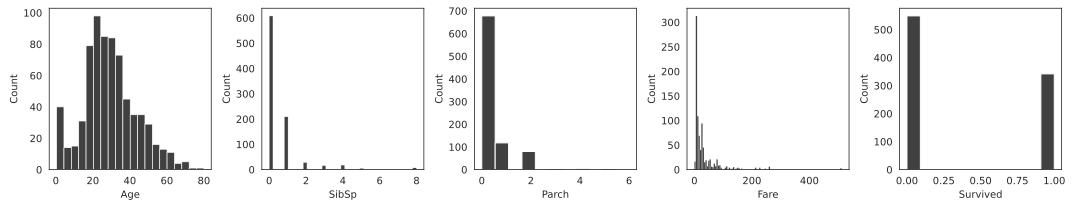

In [10]:
# make histograms
fig, axs = plt.subplots(1, len(num_feature_names), figsize=(3*len(num_feature_names), 3))

for i, num_feature_name in enumerate(num_feature_names):
    sns.histplot(data=data_train_num[num_feature_name], ax=axs[i], color="k")
fig.tight_layout()
plt.show()

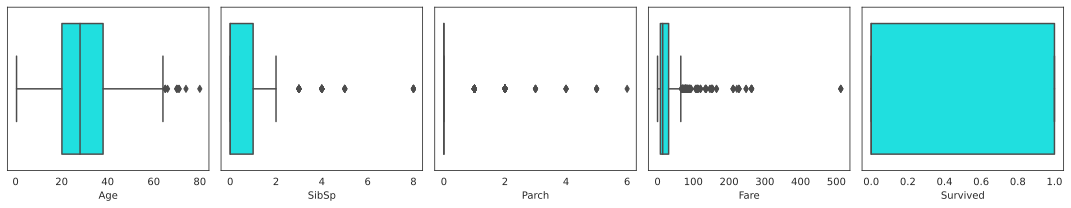

In [11]:
# make boxplots
fig, axs = plt.subplots(1, len(num_feature_names), figsize=(3*len(num_feature_names), 3))

for i, num_feature_name in enumerate(num_feature_names):
    sns.boxplot(x=num_feature_name, data=data_train_num, ax=axs[i], color="cyan")
fig.tight_layout()
plt.show()

## Correlation

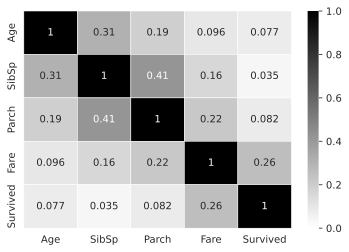

In [12]:
corr = data_train_num.corr(method="pearson").abs()
sns.heatmap(corr, vmin=0, vmax=1, cmap="binary", annot=True, linewidths=0.5);

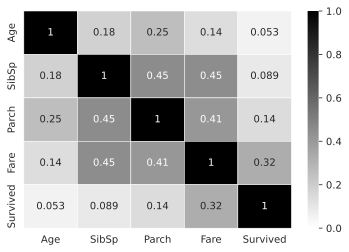

In [13]:
corr = data_train_num.corr(method="spearman").abs()
sns.heatmap(corr, vmin=0, vmax=1, cmap="binary", annot=True, linewidths=0.5);

In [14]:
pd.pivot_table(data_train_num, index="Survived", values = num_feature_names, aggfunc=["mean", "median"]).round(2)

mean                    median                  
            Age   Fare Parch SibSp    Age  Fare Parch SibSp
Survived                                                   
0         30.63  22.12  0.33  0.55   28.0  10.5     0     0
1         28.34  48.40  0.46  0.47   28.0  26.0     0     0

 
 
-----------------
## separate categorial X values from all data + y

In [15]:
cat_feature_names = ["Pclass", "Sex", "Ticket", "Cabin", "Embarked"] + ["Survived"]
cat_feature_names

['Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Survived']

In [16]:
data_train_cat = data_train[cat_feature_names]

In [17]:
data_train_cat.head()

,Pclass,Sex,Ticket,Cabin,Embarked,Survived
0,3,male,A/5 21171,NaN,S,0
1,1,female,PC 17599,C85,C,1
2,3,female,STON/O2. 3101282,NaN,S,1
3,1,female,113803,C123,S,1
4,3,male,373450,NaN,S,0


In [18]:
data_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Pclass    891 non-null    int64 
 1   Sex       891 non-null    object
 2   Ticket    891 non-null    object
 3   Cabin     204 non-null    object
 4   Embarked  889 non-null    object
 5   Survived  891 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 41.9+ KB


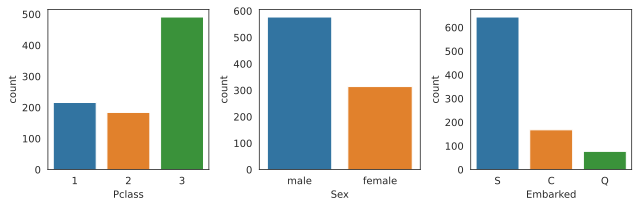

In [19]:
cols_to_plot = ["Pclass", "Sex", "Embarked"]
fig, axs = plt.subplots(1, len(cols_to_plot), figsize=(3*len(cols_to_plot), 3))

for i, col in enumerate(cols_to_plot):
    sns.countplot(x=col, data=data_train_cat, ax=axs[i])
fig.tight_layout()
plt.show()

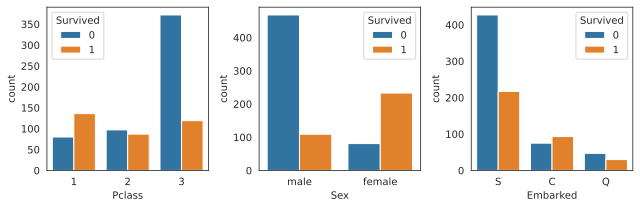

In [20]:
fig, axs = plt.subplots(1, len(cols_to_plot), figsize=(3*len(cols_to_plot), 3))

for i, col in enumerate(cols_to_plot):
    sns.countplot(x=col, hue="Survived", data=data_train_cat, ax=axs[i])
fig.tight_layout()
plt.show()



----
# [Titanic-infos](https://en.wikipedia.org/wiki/Titanic) from Wikipedia

## route of [maiden voyage](https://en.wikipedia.org/wiki/Titanic#Maiden_voyage)

1. England: Southampton
2. France: Cherbourg
3. Ireland: Queenstown

In [21]:
print(data_train_cat.Embarked.to_numpy())
data_train_cat["Embarked"] = data_train_cat.Embarked.fillna(value="S")
print(data_train_cat.Embarked.to_numpy())

['S' 'C' 'S' 'S' 'S' 'Q' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'S' 'S' 'S' 'Q' 'S'
 'S' 'C' 'S' 'S' 'Q' 'S' 'S' 'S' 'C' 'S' 'Q' 'S' 'C' 'C' 'Q' 'S' 'C' 'S'
 'C' 'S' 'S' 'C' 'S' 'S' 'C' 'C' 'Q' 'S' 'Q' 'Q' 'C' 'S' 'S' 'S' 'C' 'S'
 'C' 'S' 'S' 'C' 'S' 'S' 'C' nan 'S' 'S' 'C' 'C' 'S' 'S' 'S' 'S' 'S' 'S'
 'S' 'C' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'Q' 'S' 'S' 'S' 'S' 'S' 'S' 'S'
 'S' 'S' 'S' 'S' 'S' 'S' 'C' 'C' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S'
 'S' 'Q' 'S' 'C' 'S' 'S' 'C' 'S' 'Q' 'S' 'C' 'S' 'S' 'S' 'C' 'S' 'S' 'C'
 'Q' 'S' 'C' 'S' 'C' 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'C' 'C' 'S' 'S' 'Q'
 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'C' 'Q' 'S' 'S' 'S' 'S' 'S'
 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'Q' 'S' 'S' 'C' 'S' 'S' 'C' 'S' 'S'
 'S' 'C' 'S' 'S' 'S' 'S' 'Q' 'S' 'Q' 'S' 'S' 'S' 'S' 'S' 'C' 'C' 'Q' 'S'
 'Q' 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'C' 'Q' 'C' 'S' 'S' 'S' 'S' 'Q' 'C'
 'S' 'S' 'C' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S'
 'S' 'S' 'S' 'S' 'S' 'S' 'C' 'Q' 'S' 'S' 'C' 'Q' 'S

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
for name, embrkd in zip(data_train.Name, data_train_cat.Embarked):
    if embrkd is np.nan:
        print(name)
    else:
        continue

In [23]:
name_dic = {"surnames": {}, "titles": {}, "given_names": {}}
for name, embrkd in zip(data_train.Name, data_train_cat.Embarked):
    if embrkd is np.nan: continue
    
    name = name.replace("(", "").replace(")", "").replace("\"", "").lower()
    
    # SURNAME
    surname, rest = [i.strip() for i in name.split(",", 1)]
    if surname in name_dic["surnames"]:
        name_dic["surnames"][surname] += 1
    else:
        name_dic["surnames"][surname] = 1
    
    # TITLES
    title, rest = [i.strip() for i in rest.split(".", 1)]
    if title in name_dic["titles"]:
        name_dic["titles"][title] += 1
    else:
        name_dic["titles"][title] = 1
    
    # GIVEN NAMES
    given_names = [i.strip() for i in rest.split(" ")]
    for given_name in given_names:
        if given_name in name_dic["given_names"]:
            name_dic["given_names"][given_name] += 1
        else:
            name_dic["given_names"][given_name] = 1
    
    
print("\nSURNAMES")
print("stone" in name_dic["surnames"])
for surname, count in name_dic["surnames"].items():
    print(surname, count)

print("\nTITLES")
for title, count in name_dic["titles"].items():
    print(title, count)

print("\nGIVEN NAMES")
print("amelie" in name_dic["given_names"])
for given_name, count in name_dic["given_names"].items():
    print(given_name, count)


SURNAMES
True
braund 2
cumings 1
heikkinen 1
futrelle 2
allen 2
moran 3
mccarthy 1
palsson 4
johnson 6
nasser 2
sandstrom 2
bonnell 1
saundercock 1
andersson 9
vestrom 1
hewlett 1
rice 5
williams 4
vander planke 3
masselmani 1
fynney 1
beesley 1
mcgowan 1
sloper 1
asplund 4
emir 1
fortune 4
o'dwyer 1
todoroff 1
uruchurtu 1
spencer 1
glynn 1
wheadon 1
meyer 3
holverson 2
mamee 1
cann 1
nicola-yarred 2
ahlin 1
turpin 2
kraeff 1
laroche 3
devaney 1
rogers 1
lennon 1
o'driscoll 1
samaan 1
arnold-franchi 2
panula 6
nosworthy 1
harper 4
faunthorpe 1
ostby 1
woolner 1
rugg 1
novel 1
west 3
goodwin 6
sirayanian 1
icard 1
harris 4
skoog 6
stewart 1
moubarek 2
nye 1
crease 1
kink 1
jenkin 1
hood 1
chronopoulos 1
bing 1
moen 1
staneff 1
moutal 1
caldwell 2
dowdell 1
waelens 1
sheerlinck 1
mcdermott 1
carrau 1
ilett 1
backstrom 2
ford 4
slocovski 1
celotti 1
christmann 1
andreasson 1
chaffee 1
dean 2
coxon 1
shorney 1
goldschmidt 1
greenfield 1
doling 2
kantor 2
petranec 1
petroff 2
white 2
johan

In [24]:
data_train_cat.Cabin.dropna().to_numpy()

array(['C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73',
       'C23 C25 C27', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60',
       'E101', 'D26', 'F E69', 'D47', 'C123', 'B86', 'F2', 'C2', 'E33',
       'B19', 'A7', 'C49', 'F4', 'A32', 'F2', 'B4', 'B80', 'G6', 'A31',
       'D36', 'D15', 'C93', 'C83', 'C78', 'D35', 'G6', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'B58 B60', 'E101', 'C22 C26', 'C65', 'E36',
       'C54', 'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'D', 'B18', 'C124',
       'C91', 'C2', 'E40', 'T', 'F2', 'C23 C25 C27', 'F33', 'C128', 'E33',
       'D37', 'B35', 'E50', 'C82', 'B96 B98', 'D36', 'G6', 'C78', 'E10',
       'C52', 'E44', 'B96 B98', 'C23 C25 C27', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'D', 'A14', 'B49', 'C93', 'B37',
       'C30', 'D20', 'C22 C26', 'B79', 'C65', 'E25', 'D46', 'F33', 'B73',
